#  EDUNET FOUNDATION-Class Exercise Notebook

# Lab 29-b Implementing BiLSTM Classifier 

## Create an BiLSTM classifier Model

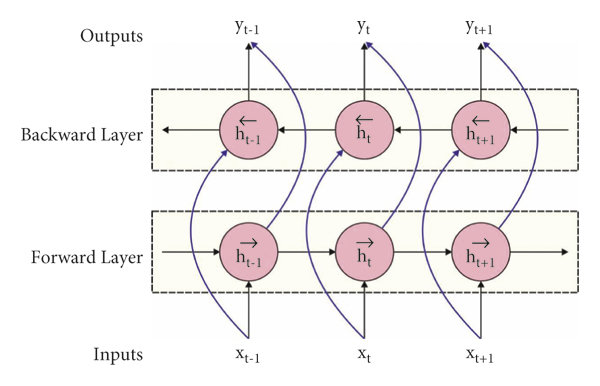

Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem.

## Import necessary libraries 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional, LSTM
from keras.layers import TimeDistributed
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

## Load dataset and divide it into training and testing

In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

## Prepreocessing text data

In [3]:

# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

## Create an BiLSTM model and train

In [4]:

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 500, 200)         106400    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 500, 1)           201       
 ibuted)                                                         
                                                                 
Total params: 266,601
Trainable params: 266,601
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 2043s 5s/step - loss: 0.6934 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 2/3
391/391 [===============

## Print the results

In [5]:

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 50.00%
